# "Анализ работы маркетплейса"

**Для работы понадобятся следующие таблицы:**  

**customers** — таблица с уникальными идентификаторами пользователей  

- customer_id — позаказный идентификатор пользователя;  
- customer_unique_id — уникальный идентификатор пользователя (аналог номера паспорта);  
- customer_zip_code_prefix — почтовый индекс пользователя;  
- customer_city — город доставки пользователя;  
- customer_state — штат доставки пользователя.  

**orders** — таблица заказов

- order_id — уникальный идентификатор заказа (номер чека);  
- customer_id — позаказный идентификатор пользователя;  
- order_status — статус заказа;  
- order_purchase_timestamp — время создания заказа;  
- order_approved_at — время подтверждения оплаты заказа;  
- order_delivered_carrier_date — время передачи заказа в логистическую службу;  
- order_delivered_customer_date — время доставки заказа;  
- order_estimated_delivery_date — обещанная дата доставки.  

**order_items** — товарные позиции, входящие в заказы

- order_id — уникальный идентификатор заказа (номер чека);  
- order_item_id — идентификатор товара внутри одного заказа;  
- product_id — ид товара (аналог штрихкода);  
- seller_id — ид производителя товара;  
- shipping_limit_date — максимальная дата доставки продавцом для передачи заказа партнеру по логистике;  
- price — цена за единицу товара;  
- freight_value — вес товара.

**Уникальные статусы заказов в таблице orders:**  
- created — создан;  
- approved — подтверждён;  
- invoiced — выставлен счёт;  
- processing — в процессе сборки заказа;  
- shipped — отгружён со склада;  
- delivered — доставлен пользователю;  
- unavailable — заказ отменён по причине недоступности товара;  
- canceled — отменён.

In [25]:
# Импорт необходимых библиотек
import pandas as pd
from operator import attrgetter
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import numpy as np
import urllib.parse
import requests

In [26]:
# Загрузим данные о клиентах
# Загрузка данных
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/9XwquGX7skFihw'
 
# Получаем загрузочную ссылку
final_url = base_url + urllib.parse.urlencode(dict(public_key=public_key))
response = requests.get(final_url) 
download_url = response.json()['href']

# загружаем в датафрейм
customers = pd.read_csv(download_url)

In [27]:
# посмотрим размер датафрейма и типы данных
print(customers.shape)
print(customers.dtypes)

(99441, 5)
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object


In [28]:
# проверим наличие пропусков
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [29]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [30]:
# загрузим данные о товарах в заказах
# Загрузка данных
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/5UxGJRdlMBGm_A'
 
# Получаем загрузочную ссылку
final_url = base_url + urllib.parse.urlencode(dict(public_key=public_key))
response = requests.get(final_url) 
download_url = response.json()['href']

# загружаем в датафрейм
order_items = pd.read_csv(download_url)

In [31]:
# изменим тип данных
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

In [32]:
# посмотрим размер датафрейма и типы данных
print(order_items.shape)
print(order_items.dtypes)

(112650, 7)
order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object


In [33]:
# проверим наличие пропусков
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [34]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [35]:
# загрузим данные о заказах
# Загрузка данных
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/GCo4QuOkwqDYzg'
 
# Получаем загрузочную ссылку
final_url = base_url + urllib.parse.urlencode(dict(public_key=public_key))
response = requests.get(final_url) 
download_url = response.json()['href']

# загружаем в датафрейм
orders = pd.read_csv(download_url)

In [36]:
# проверим наличие пропусков
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [37]:
# изменим тип данных 

orders[[
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]] = orders[[
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]].apply(lambda x: pd.to_datetime(x))

In [38]:
# определим размер датафрейма и типы данных
print(orders.shape)
print(orders.dtypes)

(99441, 8)
order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object


In [39]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


**Задача 1.**  
Оценить месячный retention в оформление заказа с помощью когортного анализа.  
Для анализа retention мы будем учитывать только статусы заказов, которые означают успешное завершение покупки, такие как delivered.

In [40]:
# Фильтрация заказов по статусу (берем только доставленные delivered)
delivered_orders = orders[orders['order_status'] == 'delivered']

In [43]:
# Объединение доставленных заказов с данными о клиентах
full_data = delivered_orders.merge(customers, on='customer_id', how='left')

In [44]:
# Извлекаем месяц и день заказа
full_data['order_period'] = full_data['order_purchase_timestamp'].dt.to_period('M')
full_data['order_period_day'] = full_data['order_purchase_timestamp'].dt.to_period('D')

In [45]:
# Присваиваем когорты на основе даты первого действия для каждого пользователя

full_data['cohort'] = (
    full_data.groupby('customer_unique_id')['order_purchase_timestamp']
             .transform('min')
             .dt.to_period('M')
)
full_data['cohort_day'] = (
    full_data.groupby('customer_unique_id')['order_purchase_timestamp']
             .transform('min')
             .dt.to_period('D')
)

In [46]:
# Рассчитываем номер периода в днях (месячные периоды, деля на 30)

full_data['period_number_month'] = np.floor(
    (full_data.order_period_day - full_data.cohort_day)
    .apply(attrgetter('n')) / 30
)

In [47]:
full_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_period,order_period_day,cohort,cohort_day,period_number_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,2017-10-02,2017-09,2017-09-04,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07,2018-07-24,2018-07,2018-07-24,0.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08,2018-08-08,2018-08,2018-08-08,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,2017-11-18,2017-11,2017-11-18,0.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02,2018-02-13,2018-02,2018-02-13,0.0


In [48]:
# Агрегируем данные по когортам и рассчитанному номеру периода (в месяцах)

df_cohort = (
    full_data.groupby(['cohort', 'period_number_month'])
             .agg(n_customers=('customer_unique_id', 'nunique'))
             .reset_index()
)

In [49]:
df_cohort.head()

,cohort,period_number_month,n_customers
0,2016-09,0.0,1
1,2016-10,0.0,262
2,2016-10,6.0,1
3,2016-10,9.0,1
4,2016-10,11.0,1


In [50]:
# Создаем сводную таблицу для когортного анализа

cohort_pivot = df_cohort.pivot_table(
    index='cohort',
    columns='period_number_month',
    values='n_customers'
)

In [51]:
cohort_pivot.head()

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,262.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,1.0,1.0
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,717.0,2.0,NaN,4.0,1.0,1.0,2.0,2.0,NaN,NaN,...,4.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN,NaN
2017-02,1628.0,2.0,3.0,6.0,4.0,2.0,4.0,1.0,2.0,4.0,...,6.0,1.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN,NaN


In [52]:
# Рассчитываем размеры когорт (первый столбец сводной таблицы)
cohort_size = cohort_pivot.iloc[:, 0]

In [53]:
# Вычисляем коэффициенты удержания, деля на размер когорты
retention_matrix = (cohort_pivot.divide(cohort_size, axis=0)).round(4)

In [54]:
retention_matrix.head()

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.0038,NaN,NaN,0.0038,...,0.0038,NaN,0.0038,NaN,0.0038,NaN,0.0038,0.0076,0.0038,0.0038
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.0028,NaN,0.0056,0.0014,0.0014,0.0028,0.0028,NaN,NaN,...,0.0056,0.0042,0.0028,NaN,0.0028,0.0028,0.0028,0.0014,NaN,NaN
2017-02,1.0,0.0012,0.0018,0.0037,0.0025,0.0012,0.0025,0.0006,0.0012,0.0025,...,0.0037,0.0006,0.0018,0.0012,0.0006,0.0006,0.0018,NaN,NaN,NaN


In [55]:
# медианное значение retention 1-го месяца
retention_matrix_1_month = retention_matrix[1].median()
print(f'Медианный retention за первый месяц: {retention_matrix_1_month: .4f}')

Медианный retention за первый месяц:  0.0035


In [56]:
# максимальный retention 3-го месяца
# когорта с максимальным retention

print(f'Максимальный retention третьего месяца: {retention_matrix[3].max(): .4f}')
print(f'Когорта с самым высоким retention на третий месяц: {retention_matrix[3].idxmax()}')

Максимальный retention третьего месяца:  0.0056
Когорта с самым высоким retention на третий месяц: 2017-01


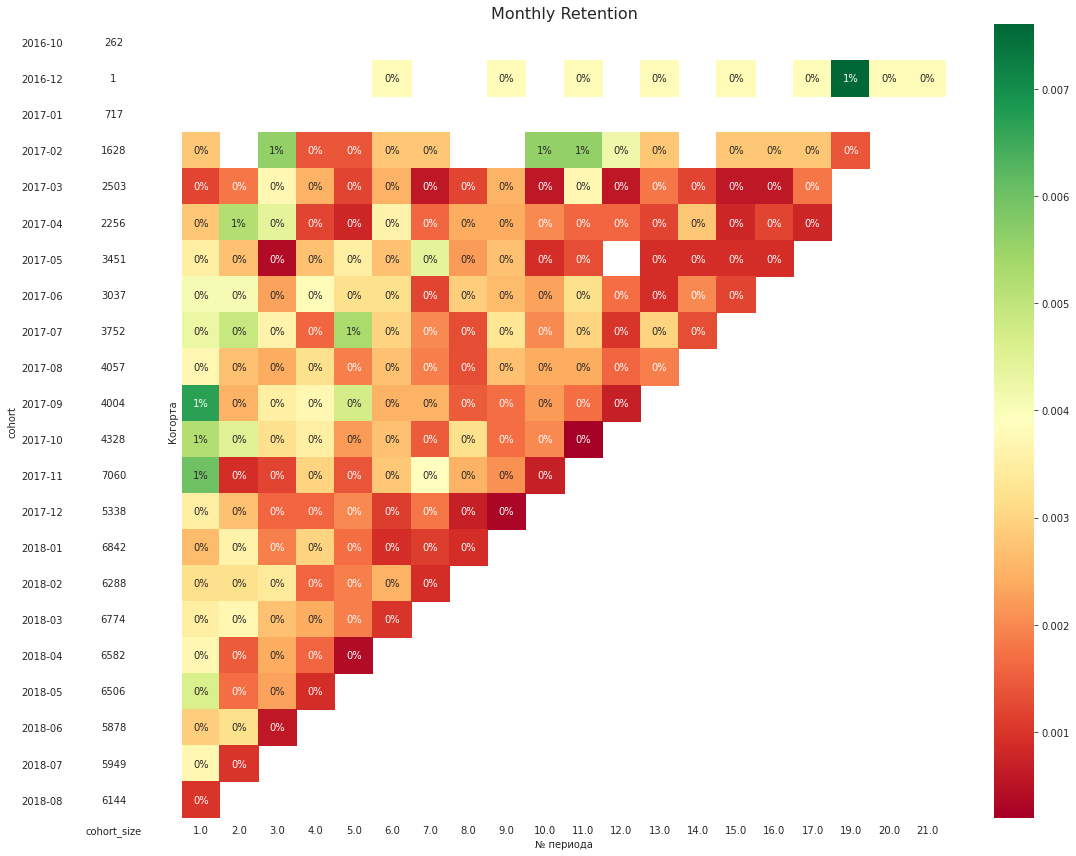

In [57]:
# Построим тепловую карту когортного анализа для визуализации выводов
# Удаляем нулевой месяц из retention_matrix для улучшения визуализации
retention_matrix_filtered = retention_matrix.iloc[:, 1:]  # Убираем первый столбец (нулевой месяц)

# Удаляем нулевой месяц из cohort_size
cohort_size_filtered = cohort_size[1:]  # Убираем первый элемент (нулевой месяц)

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # Тепловая карта для коэффициентов удержания
    sns.heatmap(retention_matrix_filtered,
                mask=retention_matrix_filtered.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Retention', fontsize=16)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')

    # Тепловая карта для размеров когорт
    cohort_size_df = pd.DataFrame(cohort_size_filtered).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()
    plt.show()

**Задача 2.**  
Определить, существует ли product/market fit у маркетплейса.

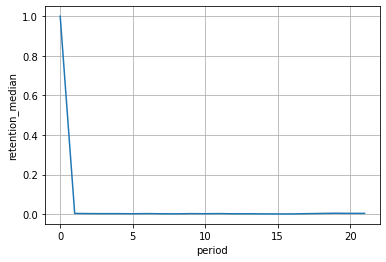

In [58]:
# построим график коэффициента удержания клиентов (Retention)
retention_matrix.median(axis=0, skipna=True).plot()
plt.xlabel('period')
plt.ylabel('retention_median')
plt.grid(True)
plt.show()

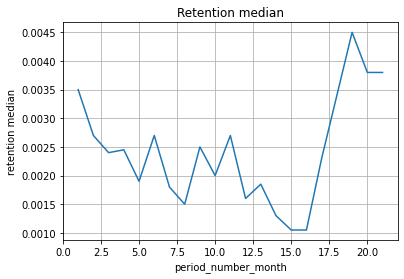

In [59]:
# для лучшей наглядности уберем нулевой столбец
retention_matrix.median(axis=0, skipna=True).iloc[1:].plot()
plt.title('Retention median')
plt.xlabel('period_number_month')
plt.ylabel('retention median')
plt.grid(True)
plt.show()

**Вывод:**  
На основании медианного retention (уровень удержания клиентов) 1-го месяца (равен 0,35 %) и максимального retention 3-го месяца (равен 0,56 %), а также тепловой карты, линейных графиков можно сделать вывод о крайне низком уровне удержания клиентов. Это показатель отсутствия Product/Market Fit у маркетплейса.

**Причины возможного отсутствия PMF:**

Слабая ценность продукта или непонимание ЦА.
Пользователи не получают ощутимой пользы после первой сессии.
Технические или UX-проблемы мешают возвращаться.
Недостаток вовлекающего контента или предложений.
Задержки в доставке заказов (8,5 % заказов доставляются с задержкой).
Проблемы с оформлением заказов (23,4 % отмененных заказов произошли по причине ошибки оплаты заказов)  

**Рекомендации:**

Глубже изучить причины оттока:
Проанализируйте фидбек, поведение ушедших пользователей.
Интервью с пользователями — почему не вернулись?
Сконцентрироваться на первой сессии:
Убедитесь, что первый опыт максимально ценен и понятен.
Улучшить onboarding: что человек видит/делает на старте?

**Задача 3.**  
Определить 5 основных метрик, на которых продакт может сконцентрироваться, чтобы максимизировать прибыль компании.

**1. Рост продаж маркетплейса**  

Метрика: Общий объем продаж (Gross Merchandise Volume, GMV).  
Эта метрика отражает общий объем продаж через маркетплейс за определенный период. Она показывает, насколько успешно маркетплейс привлекает покупателей и генерирует доход.

In [60]:
# Объединение данных о заказах с данными о доставленных товарах
merged_data = pd.merge(order_items, delivered_orders, on='order_id')

In [61]:
# посмотрим структуру заказа
merged_data.query("order_id == '00143d0f86d6fbd9f9b38ab440ac16f5'")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06


In [62]:
# рассчитываем выручку по каждому заказу
order_price_sum = merged_data.groupby('order_id').price.sum().reset_index()

In [63]:
# объединяем с merged_data

merged_data_1 = pd.merge(
    merged_data[['order_id', 'order_purchase_timestamp']],
    order_price_sum,
    on='order_id'
)

In [64]:
# Группировка по месяцам и расчет объема продаж GMV по всем заказам

monthly_sales = (
    merged_data_1.groupby(merged_data['order_purchase_timestamp']
                 .dt.to_period('M'))['price']
                 .sum()
                 .reset_index()
)
monthly_sales = monthly_sales.rename(columns={'price': 'price_sum'})

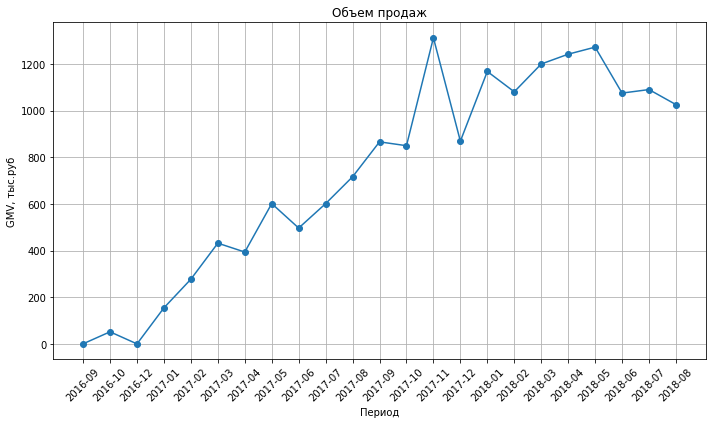

In [65]:
# построим график GMV для визуализации
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['order_purchase_timestamp'].astype(str),
         monthly_sales['price_sum']/1000, marker='o')
plt.title('Объем продаж')
plt.xlabel('Период')
plt.ylabel('GMV, тыс.руб')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**2. Объем аудитории, которой продукт доставляет ценность**  

Метрика: Количество платящих клиентов (Paying Users).  
Эта метрика показывает количество уникальных пользователей, которые совершают хотя бы один заказ в продукте в течение месяца. Она помогает оценить, сколько клиентов на самом деле извлекают ценность из маркетплейса, то есть находят тот товар, который им нужен.

In [66]:
# берем full_data, где order_status = delivered

paying_users = (
    full_data.groupby(full_data['order_purchase_timestamp']
             .dt.to_period('M'))['customer_unique_id']
             .nunique()
             .reset_index()
)

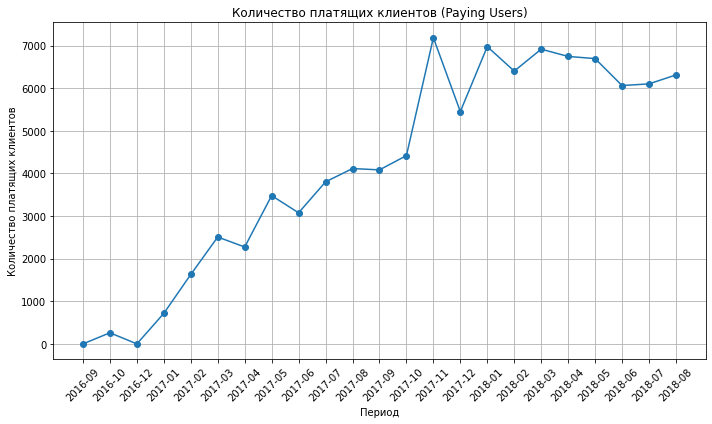

In [67]:
# построим график MAU для визуализации
plt.figure(figsize=(10, 6))
plt.plot(paying_users['order_purchase_timestamp'].astype(str),
         paying_users['customer_unique_id'], marker='o')
plt.title('Количество платящих клиентов (Paying Users)')
plt.xlabel('Период')
plt.ylabel('Количество платящих клиентов')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**3. Заинтересованность новых клиентов в продукте**  

Метрика: Конверсия в первую покупку (Conversion to Paying User).  
Эта метрика измеряет процент новых пользователей, которые совершают покупку после первого визита на сайт или в приложение. Она отражает, насколько эффективно маркетплейс привлекает и конвертирует новых клиентов.

**4. Вовлеченность клиента в продолжение использования продукта**  

Метрика: Коэффициент удержания (Retention Rate)  
Эта метрика показывает процент клиентов, которые продолжают использовать продукт после первого месяца. Она помогает понять, насколько хорошо продукт удерживает клиентов и удовлетворяет их потребности.

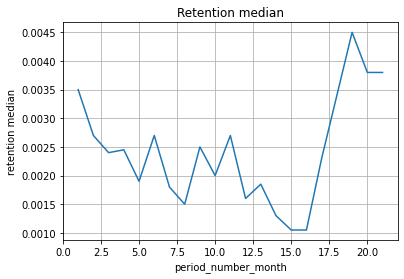

In [68]:
# построим график и для лучшей наглядности уберем нулевой столбец
retention_matrix.median(axis=0, skipna=True).iloc[1:].plot()
plt.title('Retention median')
plt.xlabel('period_number_month')
plt.ylabel('retention median')
plt.grid(True)
plt.show()

**5. Денежное выражение вовлеченности клиента**  

Метрика: ARPPU (Revenue Per Paying User).  
Эта метрика отражает общую выручку, которую компания получает с одного клиента в среднем

In [69]:
# Объединяем дата-фреймы
average_revenue = pd.merge(monthly_sales, paying_users, on='order_purchase_timestamp')

In [70]:
# создаем новый столбец, показывающий средний доход на одного пользователя

average_revenue['arppu'] = (
    average_revenue['price_sum'] / average_revenue['customer_unique_id']
).round(2)

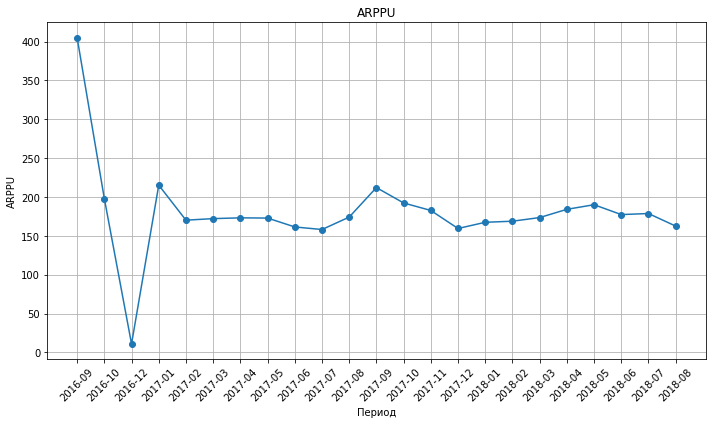

In [71]:
# построим график ARPPU для визуализации
plt.figure(figsize=(10, 6))
plt.plot(average_revenue['order_purchase_timestamp'].astype(str),
         average_revenue['arppu'], marker='o')
plt.title('ARPPU')
plt.xlabel('Период')
plt.ylabel('ARPPU')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Задача 4.** Выбрать одну из 3 основных гипотез с помощью фреймворка ICE  

**Гипотеза 1. Если исправим баг в системе процессинга заказов, то клиентам не придется сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится.**

Для расчета Impact по этой гипотезе можно посчитать количество заказов, который остались в статусе отмены. Заказом в статусе отмены будем считать статусы: canceled, unavailable

In [72]:
# зададим функцию перевода значения метрики в impact по следующей шкале:
def impact_score(metric):
    """
    Рассчитывает "score" в зависимости от значения метрики.
    """
    if metric <= 50:
        score = 1
    elif metric <= 150:
        score = 2
    elif metric <= 350:
        score = 3
    elif metric <= 750:
        score = 4
    elif metric <= 1550:
        score = 5
    elif metric <= 3150:
        score = 6
    elif metric <= 6350:
        score = 7
    elif metric <= 12750:
        score = 8
    elif metric <= 25550:
        score = 9
    else:
        score = 10
    
    return score

In [73]:
# объединяем датасет по заказам с дата-сетом по клиентам
orders_customers = pd.merge(orders, customers, on='customer_id')
# исключим данные по май 2017 года включительно, когда продукт лишь выходил на проектные мощности.
orders_customers_2017 = orders_customers.query(
    "order_purchase_timestamp >= '2017-06-01'"
)

In [74]:
# посчитаем число пользователей, которые могли уйти с маркетплейса из-за отмененного заказа 

customers_churn_1 = (
    orders_customers_2017.query("order_status == 'canceled' or order_status == 'unavailable'")
                         .customer_unique_id.nunique()
)
print(f'Количество отмененных заказов: {customers_churn_1}')

Количество отмененных заказов: 960


In [75]:
# рассчитаем ICE для гипотезы 1

confidence_1 = 8
ease_1 = 6
impact_1 = impact_score(customers_churn_1)
ICE_1 = confidence_1 * ease_1 * impact_1
print(ICE_1)

240


**Гипотеза 2. Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счет повторных заказов.**

Для расчета Impact по этой гипотезе можно посчитать количество заказов, которые были доставлены с опозданием. Конверсию в повторный заказ возьмем равной 0.0035.

In [76]:
# вычисляем количество клиентов, которые могли уйти с маркетплейса из-за опоздания заказа
# (дата фактической доставки больше даты обещанной доставки)
customers_churn_2 = (
    orders_customers_2017.query(
        "order_delivered_customer_date > order_estimated_delivery_date & order_status == 'delivered'"
    )
    .customer_unique_id.nunique()
)
# количество повторных заказов клиентов умножим на конверсию
customers_churn_2_full = (customers_churn_2 * retention_matrix_1_month).round()
print(f'Количество задержанных заказов: {customers_churn_2}')
print(f'Возможное количество повторных заказов: {customers_churn_2_full}')

Количество задержанных заказов: 7245
Возможное количество повторных заказов: 25.0


In [77]:
# рассчитаем ICE для гипотезы 2

confidence_2 = 10
ease_2 = 4
impact_2 = impact_score(customers_churn_2_full)
ICE_2 = confidence_2 * ease_2 * impact_2
print(ICE_2)

40


**Гипотеза 3. Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при выполнении заказа, вследствие чего количество заказов увеличится за счет повторных заказов.**

Для расчета Impact по этой гипотезе можно посчитать количество заказов, где клиент сделал только единичный заказ. Конверсию в повторный заказ возьмем равной 0.0035.

In [78]:
# количество клиентов, которые сделали заказ

customers_count = (
    orders_customers_2017.groupby('customer_unique_id', as_index=False)
                         .order_id.count()
)
# количество клиентов, которые не делали повторных заказов (т.е заказывали всего 1 раз)
customers_churn_3 = (
    customers_count.query("order_id == 1")
                   .customer_unique_id.nunique()
)
print(f'Количество задержанных заказов: {customers_churn_3}')

Количество задержанных заказов: 82559


In [79]:
# количество повторных заказов клиентов умножим на конверсию
customers_churn_3_full = (customers_churn_3 * retention_matrix_1_month).round()
print(f'Возможное количество повторных заказов: {customers_churn_3_full}')

Возможное количество повторных заказов: 289.0


In [80]:
# рассчитаем ICE для гипотезы 3

confidence_3 = 5
ease_3 = 9
impact_3 = impact_score(customers_churn_3_full)
ICE_3 = confidence_3 * ease_3 * impact_3
print(ICE_3)

135


**Вывод. По итогам ICE-скоринга приоритетной считается Гипотеза 1.**  
Эффект Гипотезы 1, выраженный в количестве клиентов, составляет 960, по ICE_1 - 240.

In [81]:
# Дополнительно посчитаем процент заказов с опозданием от общего количества заказов
# количестов доставленных заказов с опозданием (берем данные с июня 2017)

late_orders = (
    orders_customers_2017.query(
        "order_delivered_customer_date > order_estimated_delivery_date & order_status == 'delivered'"
    )
    .order_id.count()
)

In [82]:
# общее количество доставленных заказов (берем данные с июня 2017)

total_orders = (
    orders_customers_2017.query("order_status == 'delivered'")
                         .order_id.count()
)

In [83]:
# доля доставленных заказов с опозданием от общего количества (берем с июня 2017)
share = (late_orders / total_orders * 100).round(1)
print(share)

8.5


In [84]:
# Дополнительно рассмотрим заказы в статусе 'canceled' (заказ отменен),
# по которому не была произведена оплата (в поле order_approved_at пропуск)
# отберем из фрейма заказы после июня 2017 года в статусе 'canceled', по которым в поле 'order_approved_at' пропуск
orders_customers_2017 = orders_customers_2017.copy()
payment_problem_orders = orders_customers_2017.query('order_status == "canceled"').loc[
    orders_customers_2017.order_approved_at.isnull()
]

# количество отмененных заказов из-за ошибки оплаты заказов
orders_canceled = payment_problem_orders.order_id.count()

In [85]:
# общее количество отмененнных заказов (берем данные с июня 2017)

total_orders_canceled = (
    orders_customers_2017.query("order_status == 'canceled'")
                         .order_id.count()
)

In [86]:
# доля отмененнных заказов из-за ошибки оплаты заказов от общего количества (берем с июня 2017)

share_canceled = (
    orders_canceled / total_orders_canceled * 100
).round(1)

print(share_canceled)

23.4


**Выводы:**

**1) Метрика, которая отражает рост объёма продаж маркетплейса GMV (Gross Merchendise Value):**  
Данная метрика отражает общий объем продаж через маркетплейс за определенный период
Динамика: уверенный рост (конец 2016 - ноябрь 2017): GMV демонстрирует стабильный и значительный рост. Плато с колебаниями (ноябрь 2017 - май 2018): после пика GMV колеблется, но в целом держится на высоком уровне. Спад (май 2018 - август 2018).
Вывод: Маркетплейс успешно масштабировал свои продажи, но из-за низкого retention, объем продаж вышел на плато и начал снижаться.  
**2) Метрика, показывающая объем аудитории, которой продукт доставляет ценность: Количество платящих клиентов (Paying Users).**   
Данная метрика показывает количество уникальных пользователей, которые совершают хотя бы один заказ в продукте в течение месяца. 
Динамика: Бурный рост (конец 2016 - ноябрь 2017): количество активных пользователей стремительно росло, достигнув пика более 7000 в ноябре 2017. Это указывает на успешный период привлечения новых пользователей или на вирусный рост. Плато и колебания (ноябрь 2017 - август 2018): после пика наблюдается снижение, а затем стабилизация числа активных пользователей в диапазоне 6000-6500. Роста почти нет, есть заметные колебания.
Вывод: Маркетплейс сумел привлечь значительное количество пользователей, но из-за высокого оттока пользователей, рост прекратился.  
**3) Метрика, отражающая заинтересованность новых клиентов в продукте: Конверсия в первую покупку (Conversion to Paying User).**  
Эта метрика измеряет процент новых пользователей, которые совершают покупку после первого визита на сайт или в приложение.
Из-за низкого retention маркетплейса графики активных пользователей и новых клиентов в разрезе месяца будут практически идентичны.
Вывод: новые клиенты не задерживаются на маркетплейсе.  
**4) Метрика, отражающая вовлеченность клиента в продолжение использования продукта: retention**  
Вывод: на основании графиков можно сделать вывод об очень низком удержании пользователей на второй и последующие месяцы, нет стабилизации retention на каком-либо уровне (отсутствие устойчивого плато), нет роста retention с течением времени.  
**5) Метрика, отражающая денежное выражение вовлеченности клиента: ARPPU (Revenue Per Paying User).**  
Данная метрика показывает средний доход с одного пользователя.
Динамика: начальная нестабильность (конец 2016): ARPPU показывает сильный провал до почти нуля в декабре 2016, а затем быстрое восстановление. Это может быть связано с особенностями запуска, сезонностью или небольшим количеством данных в начале. Далее выходит на плато. Отсутствует рост.
Вывод: Маркетплейс имел достаточно высокий ARPPU в течение длительного периода, что указывало на успешность монетизации с каждого активного пользователя. ARPPU стабильно, что хорошо, но не показывает значительного роста, который мог бы компенсировать низкое удержание и падение GMV. Это говорит о том, что существующие пользователи тратят примерно одинаково, но их становится меньше.

**Гипотезы по улучшению продукта:**
По итогам изучения результатов когортного анализа и метрик были сформулированы три гипотезы.
Для приоритизации гипотез был применен фреймворк ICE. Для расчета Impact от реализации каждой гипотезы было подсчитано количество пользователей, которые могли уйти ввиду той или иной проблемы.

| Гипотеза    | Impact | Confidence | Ease | ICE  |
|-------------|--------|------------|------|------|
| **Гипотеза 1**| **5** | **8**  | **6**   | **240** |
| Гипотеза 2  | 1      | 10         | 4    | 40   |
| Гипотеза 3  | 3      | 5          | 9    | 135  |


По итогам анализа в качестве приоритетной была выбрана **Гипотеза 1**: Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.

**Для проверки выбранной гипотезы в рамках A/B-тестирования были отобраны следующие метрики:**  
**- Целевая метрика:**  
Количество успешно доставленных заказов (или Доля успешно доставленных заказов от общего числа созданных заказов).
Основная цель — увеличить количество завершённых заказов, избегая отмен.  
**- Прокси-метрика:**  
Процент отмененных заказов (или Количество отмененных заказов), связанных с ошибками процессинга.
Уменьшение отмен — косвенный показатель улучшения системы.  
**- Барьерная метрика:**  
Среднее время процессинга заказа (от создания до присвоения статуса "Готов к отгрузке" / "Передан в доставку").
Помогает контролировать, не ухудшится ли качество сервиса или скорость выполнения заказов после внедрения изменений. Важно, чтобы исправление бага не привело к задержкам, иначе это может снизить качество сервиса.  

**Рекомендации по продукту:**
1. Немедленные действия (критические):
- Идентификация причины спада GMV в 2018-05/08. Что произошло в этот период? Было ли отключение сервиса, массовая ошибка, изменение политики, или что-то еще? Без понимания этого, все остальные действия будут менее эффективны.
- Анализ оттока (Churn Analysis):
Опросы пользователей: Связаться с ушедшими пользователями, чтобы понять причины их ухода.
Анализ поведения пользователей: Отслеживать, какие действия совершают пользователи до того, как уйти.
Анализ причин спада GMV: Что послужило причиной падения.
2. Стратегические рекомендации:
- Сосредоточиться на удержании (Retention):
- Улучшение онбординга: Убедиться, что новые пользователи быстро понимают ценность продукта и начинают им активно пользоваться.
- Ценность продукта: Пересмотреть ценностное предложение. Что делает продукт уникальным и незаменимым?
- Вовлечение (Engagement): Разработать стратегии для повышения вовлеченности пользователей (например, новые функции, геймификация, персонализация, уведомления).
- Поддержка пользователей: Улучшить качество поддержки, чтобы решать проблемы пользователей оперативно.
- Создание привычки: Продумать, как продукт может стать частью повседневной жизни пользователя.
- Приоритизация функций: Сосредоточиться на разработке функций, которые действительно решают проблемы пользователей и способствуют удержанию.
- Исследование потребностей рынка (Market Research):
Провести глубинные интервью с текущими и потенциальными пользователями.
Анализировать конкурентов: что они делают лучше?
Выявить неудовлетворенные потребности в целевом сегменте.